## Data Overview
* train: 7,381 X 3, 7,381 unique id's same as number of rows, 929 unique locations
  - faulty_severity
    * 0: 4,784
    * 1: 1,871
    * 2:   726
* test: 11,171 X 2, 11,171 unique id's same as number of rows, 1,039 unique locations, 842 of them are in the train

Each of the following tables have 18,552 unique id's, 7,381 shared with train, 11,171 shared with test:

* event: 31,170 X 2, 18,552 unique id's, 53 unique event_type.
* logf: 58,671 X 3, 18,552 unique id's, 386 unique features, 341 unique volume.  test.
* sev: 18,552 X 2, id's all unique, 5 unique severity_type.
* resource: 21,076 X 2, 18,552 unique id's, 10 unique resource_type.

In [8]:
%matplotlib inline 

In [51]:
train_sev = pd.merge(train, sev, on='id', how='left')

In [53]:
train_sev_by_severity = train_sev.groupby('severity_type')

In [54]:
train_sev_by_severity['fault_severity'].value_counts()

severity_type     
severity_type 1  0    1778
                 1    1117
                 2     480
severity_type 2  0    2652
                 1     693
                 2     246
severity_type 3  0       4
severity_type 4  0     338
                 1      50
severity_type 5  0      12
                 1      11
dtype: int64

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [13]:
fault_severity = train.groupby('location')['fault_severity'].value_counts().unstack(level=1)

In [15]:
fault_severity = fault_severity.fillna(0)

In [18]:
fault_severity_frac = fault_severity.div(fault_severity.sum(axis=1), axis=0)

In [19]:
fault_severity_frac.head()

,0,1,2
location,,,
location 1,0.583333,0.333333,0.083333
location 10,1.000000,0.000000,0.000000
location 100,0.866667,0.133333,0.000000
location 1000,1.000000,0.000000,0.000000
location 1002,1.000000,0.000000,0.000000


In [20]:
fault_severity_frac.to_csv('fault_severity_frac.csv')

In [30]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
dtype: int64

In [29]:
train.loc[:, 'id'].nunique()

7381

In [24]:
train.shape

(7381, 3)

In [25]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [26]:
# 929 locations in train dataset
len(set(train.location))

929

In [27]:
train.loc[(train.loc[:, 'id'] == 14121).values]

,id,location,fault_severity
0,14121,location 118,1


In [37]:
train.loc[(train.loc[:, 'location'] == 'location 118').values]

,id,location,fault_severity
0,14121,location 118,1
94,6821,location 118,0
103,12008,location 118,0
228,18441,location 118,0
897,9479,location 118,0
1018,2627,location 118,0
1201,3072,location 118,0
1434,8714,location 118,0
1678,14167,location 118,0
1910,8676,location 118,0


In [18]:
train.id.nunique()

7381

In [18]:
test = pd.read_csv('test.csv')

In [32]:
test.loc[:, 'id'].nunique()

11171

In [33]:
test.loc[:, 'location'].nunique()

1039

In [28]:
test.loc[test.loc[:, 'location'].isin(train.loc[:, 'location']), 'location'].nunique()

842

In [31]:
test.shape

(11171, 2)

In [21]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [23]:
test.id.nunique()

11171

In [26]:
test.location.nunique()

1039

In [34]:
event = pd.read_csv('event_type.csv')

In [36]:
event.loc[event.loc[:, 'id'].isin(train.loc[:, 'id']), 'id'].nunique()

7381

In [37]:
event.loc[event.loc[:, 'id'].isin(test.loc[:, 'id']), 'id'].nunique()

11171

In [22]:
event.id.nunique()

18552

In [35]:
event.event_type.nunique()

53

In [21]:
event.shape

(31170, 2)

In [17]:
event.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [8]:
# 53 event type
event.event_type.nunique()

53

In [7]:
event_index = event.set_index(['id', 'event_type']).index
event_1 = pd.Series(1, index=event_index)
event_type = event_1.unstack(level=1).fillna(0)

In [51]:
event.loc[(event.loc[:, 'id'] == 1).values]

,id,event_type
18299,1,event_type 11
18300,1,event_type 13


In [52]:
logf.loc[(logf.loc[:, 'id'] == 1).values]

,id,log_feature,volume
36197,1,feature 68,2
36198,1,feature 345,2
36199,1,feature 179,1


In [43]:
event_by_id = event.groupby('id')

In [45]:
event_type = event_by_id['event_type'].apply(lambda x: x.tolist())

In [46]:
event_type.head()

id
1    [event_type 11, event_type 13]
2    [event_type 35, event_type 34]
3                   [event_type 11]
4                   [event_type 47]
5    [event_type 34, event_type 35]
Name: event_type, dtype: object

In [3]:
logf = pd.read_csv('log_feature.csv')

In [4]:
# wanna know the correlation between volume and category
train_log = pd.merge(train, logf, on='id', how='left')

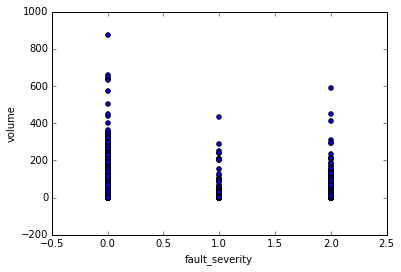

In [9]:
train_log.loc[:, ['fault_severity', 'volume']].plot(kind='scatter', x='fault_severity', y='volume')

In [40]:
logf.loc[logf.loc[:, 'id'].isin(train.loc[:, 'id']), 'id'].nunique()

7381

In [41]:
logf.loc[logf.loc[:, 'id'].isin(test.loc[:, 'id']), 'id'].nunique()

11171

In [39]:
logf.loc[:, 'id'].nunique()

18552

In [38]:
logf.shape

(58671, 3)

In [11]:
logf.log_feature.nunique()

386

In [12]:
logf.volume.nunique()

341

In [13]:
logf.volume.describe()

count    58671.000000
mean         9.685296
std         27.314433
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       1310.000000
Name: volume, dtype: float64

In [9]:
logf.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [50]:
logf.loc[(logf.loc[:, 'id'] == 1).values]

,id,log_feature,volume
36197,1,feature 68,2
36198,1,feature 345,2
36199,1,feature 179,1


In [9]:
log_series = logf.set_index(['id', 'log_feature'])

In [10]:
log_series_re = log_series.unstack(level=1).fillna(0)

In [65]:
log_series_re.head()

volume                                                 \
log_feature feature 1 feature 10 feature 100 feature 101 feature 102   
id                                                                     
1                   0          0           0           0           0   
2                   0          0           0           0           0   
3                   0          0           0           0           0   
4                   0          0           0           0           0   
5                   0          0           0           0           0   

                                                                         \
log_feature feature 103 feature 104 feature 105 feature 106 feature 107   
id                                                                        
1                     0           0           0           0           0   
2                     0           0           0           0           0   
3                     0           0           0           0           0   
4                     0           0           0           0           0   
5                     0           0           0           0           0   

               ...                                                             \
log_feature    ...     feature 90 feature 91 feature 92 feature 93 feature 94   
id             ...                                                              
1              ...              0          0          0          0          0   
2              ...              0          0          0          0          0   
3              ...              0          0          0          0          0   
4              ...              0          0          0          0          0   
5              ...              0          0          0          0          0   

                                                                    
log_feature feature 95 feature 96 feature 97 feature 98 feature 99  
id                                                                  
1                    0          0          0          0          0  
2                    0          0          0          0          0  
3                    0          0          0          0          0  
4                    0          0          0          0          0  
5                    0          0          0          0          0  

[5 rows x 386 columns]

In [14]:
resource = pd.read_csv('resource_type.csv')

In [42]:
resource.loc[resource.loc[:, 'id'].isin(train.loc[:, 'id']), 'id'].nunique()

7381

In [43]:
resource.loc[resource.loc[:, 'id'].isin(test.loc[:, 'id']), 'id'].nunique()

11171

In [44]:
resource.shape

(21076, 2)

In [45]:
resource.loc[:, 'id'].nunique()

18552

In [15]:
resource.resource_type.nunique()

10

In [11]:
resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [30]:
resource.loc[(resource.loc[:, 'id'] == 14121).values]

,id,resource_type
3545,14121,resource_type 2


In [16]:
res_index = resource.set_index(['id', 'resource_type']).index
res_1 = pd.Series(1, index=res_index)
res_type = res_1.unstack(level=1).fillna(0)

In [16]:
sev = pd.read_csv('severity_type.csv')

In [48]:
sev.loc[sev.loc[:, 'id'].isin(train.loc[:, 'id']), 'id'].nunique()

7381

In [49]:
sev.loc[sev.loc[:, 'id'].isin(test.loc[:, 'id']), 'id'].nunique()

11171

In [46]:
sev.shape

(18552, 2)

In [47]:
sev.loc[:, 'id'].nunique()

18552

In [17]:
sev.severity_type.nunique()

5

In [23]:
sev.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [31]:
sev.loc[(sev.loc[:, 'id'] == 14121).values]

,id,severity_type
3154,14121,severity_type 2


In [26]:
sev_index = sev.set_index(['id', 'severity_type']).index
sev_1 = pd.Series(1, index=sev_index)
sev_type = sev_1.unstack(level=1).fillna(0)

In [27]:
sev_type.head()

severity_type,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5
id,,,,,
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0


In [14]:
sample = pd.read_csv('sample_submission.csv')

In [36]:
sample.predict_2.value_counts()

0    11171
dtype: int64

In [28]:
train_dat = pd.merge(dat, sev_type.reset_index(), on='id', how='left')
train_dat = pd.merge(train_dat, res_type.reset_index(), on='id', how='left')
train_dat = pd.merge(train_dat, log_series_re.loc[:, 'volume'].reset_index(), on='id', how='left')
train_dat = pd.merge(train_dat, event_type.reset_index(), on='id', how='left')

In [29]:
train_dat.head()

,id,location,fault_severity,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,resource_type 1,resource_type 10,...,event_type 5,event_type 50,event_type 51,event_type 52,event_type 53,event_type 54,event_type 6,event_type 7,event_type 8,event_type 9
0,14121,location 118,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,location 91,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14394,location 152,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8218,location 931,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14804,location 120,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
_.loc[:, 'feature 312']

0    19
1     0
2     0
3     0
4     0
Name: feature 312, dtype: float64

In [33]:
train_dat.shape

(7381, 457)

In [30]:
train_dat.to_csv('train_dataset.csv', index=False)

In [31]:
test_dat = pd.merge(test, sev_type.reset_index(), on='id', how='left')
test_dat = pd.merge(test_dat, res_type.reset_index(), on='id', how='left')
test_dat = pd.merge(test_dat, log_series_re.loc[:, 'volume'].reset_index(), on='id', how='left')
test_dat = pd.merge(test_dat, event_type.reset_index(), on='id', how='left')

In [97]:
test.shape

(11171, 2)

In [32]:
test_dat.shape

(11171, 456)

In [34]:
test_dat.to_csv('test_dataset.csv', index=False)